In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/purni/Desktop/medical/medical_insurance.csv")

# Basic info
print(df.shape)
print(df.info())

# Check missing values
print(df.isnull().sum())

# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Preview data
df.head()


(2772, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Duplicates: 1435


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Remove duplicates
df = df.drop_duplicates()

# Confirm new shape
print("Shape after removing duplicates:", df.shape)

# Double-check no duplicates left
print("Duplicates after cleaning:", df.duplicated().sum())


Shape after removing duplicates: (1337, 7)
Duplicates after cleaning: 0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


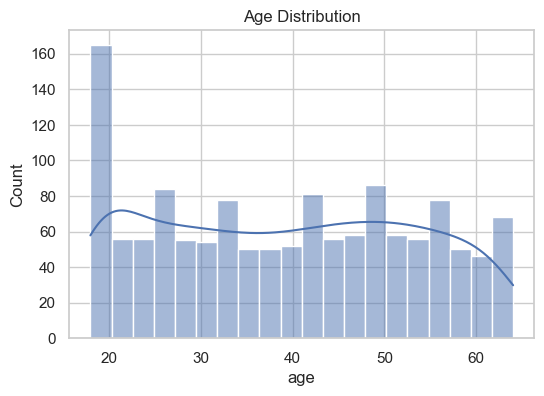

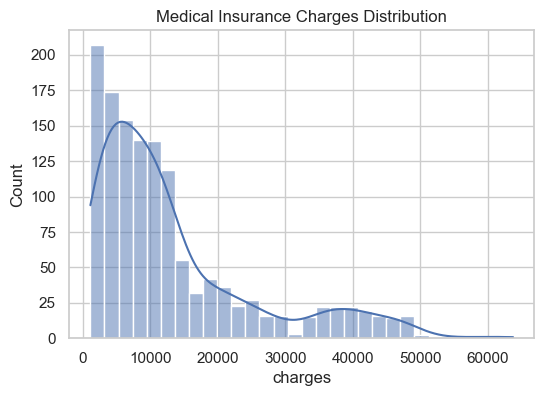

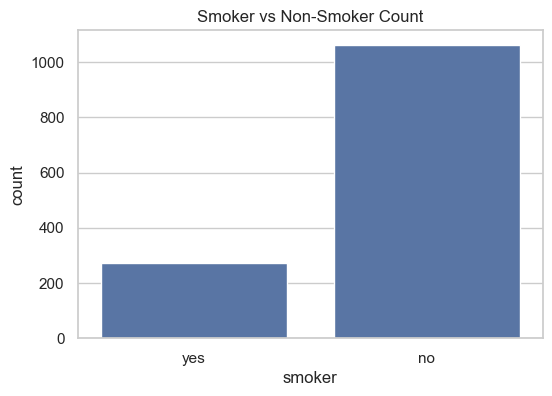

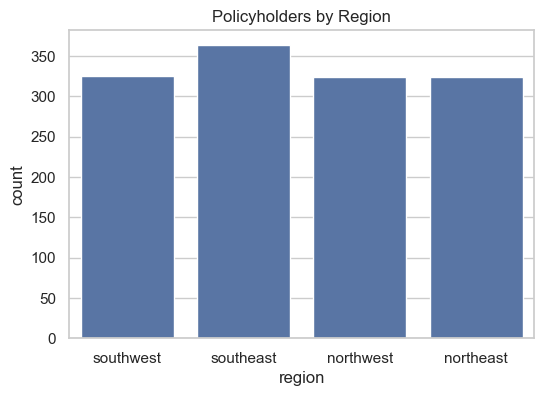

In [8]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Charges distribution
plt.figure(figsize=(6,4))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Medical Insurance Charges Distribution')
plt.show()

# Smoker count
plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df)
plt.title('Smoker vs Non-Smoker Count')
plt.show()

# Region count
plt.figure(figsize=(6,4))
sns.countplot(x='region', data=df)
plt.title('Policyholders by Region')
plt.show()


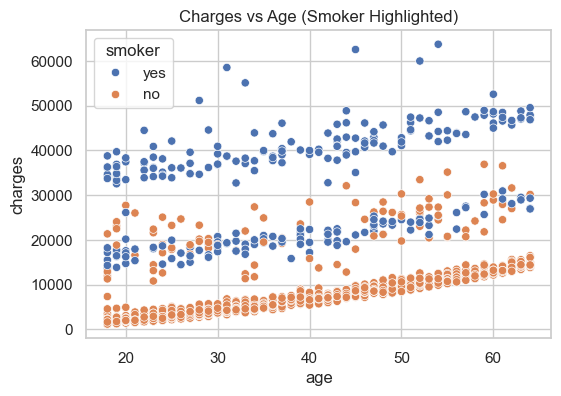

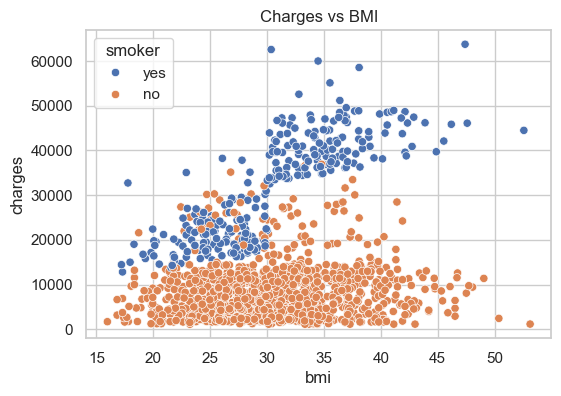

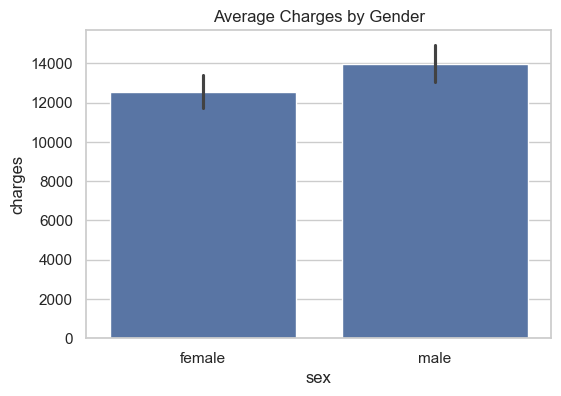

In [9]:
# Charges vs Age
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs Age (Smoker Highlighted)')
plt.show()

# Charges vs BMI
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs BMI')
plt.show()

# Average charges by gender
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Average Charges by Gender')
plt.show()


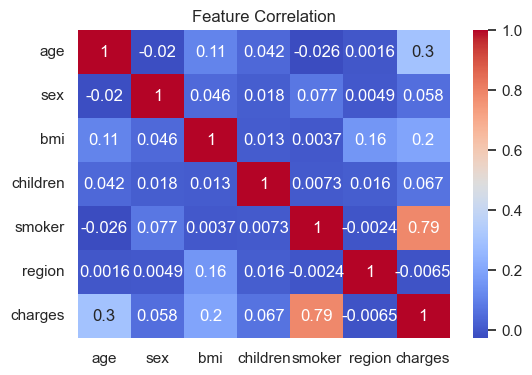

In [10]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe for correlation
df_corr = df.copy()

# Encode categorical columns
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df_corr[col] = le.fit_transform(df_corr[col])

# Now plot correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


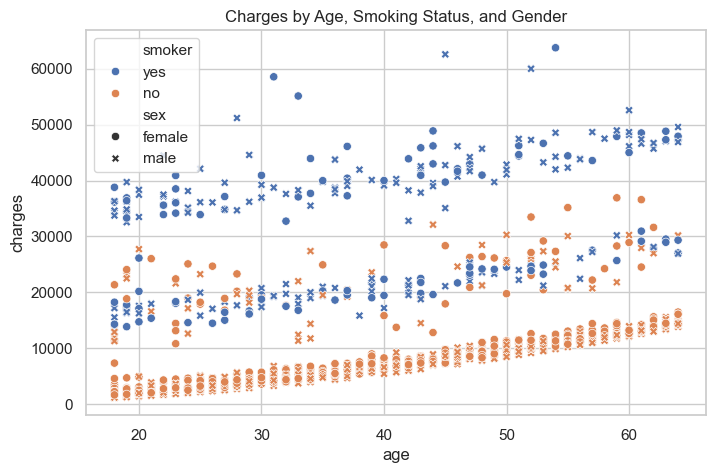

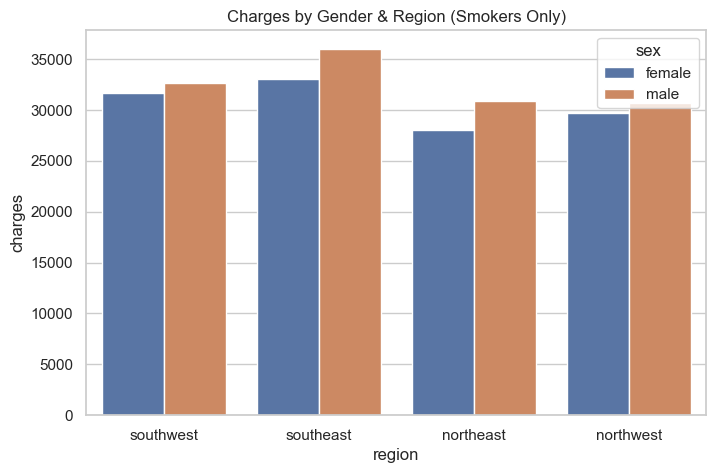

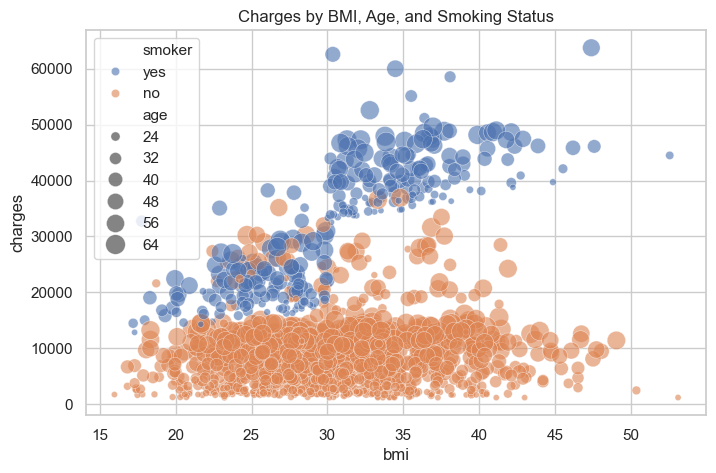

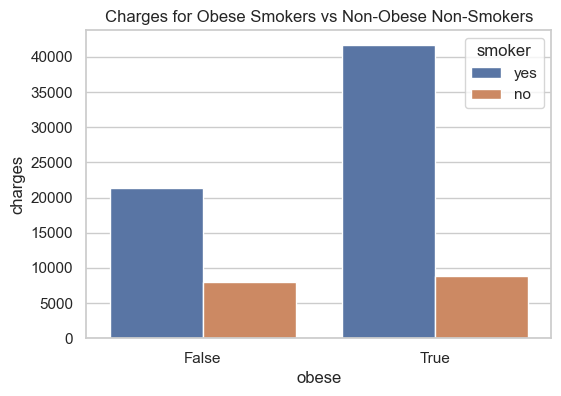

In [11]:

# 1. Smoking status + Age vs Charges
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', style='sex', data=df)
plt.title('Charges by Age, Smoking Status, and Gender')
plt.show()

# 2. Impact of gender & region on charges for smokers
plt.figure(figsize=(8,5))
sns.barplot(x='region', y='charges', hue='sex', data=df[df['smoker'] == 'yes'], errorbar=None)
plt.title('Charges by Gender & Region (Smokers Only)')
plt.show()

# 3. Age, BMI, and Smoking Status combined
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', size='age', data=df, sizes=(20,200), alpha=0.6)
plt.title('Charges by BMI, Age, and Smoking Status')
plt.show()

# 4. Obese smokers vs non-obese non-smokers
df['obese'] = df['bmi'] > 30
plt.figure(figsize=(6,4))
sns.barplot(x='obese', y='charges', hue='smoker', data=df, errorbar=None)
plt.title('Charges for Obese Smokers vs Non-Obese Non-Smokers')
plt.show()


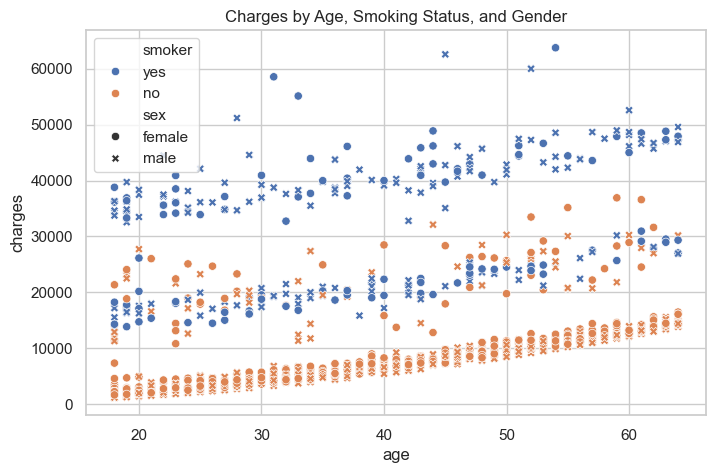

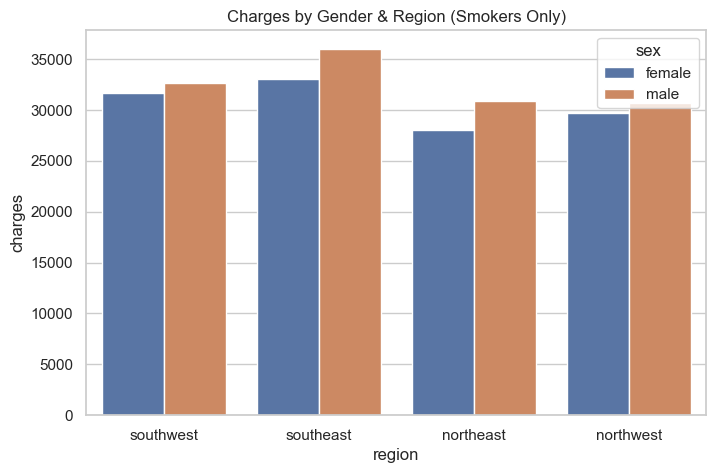

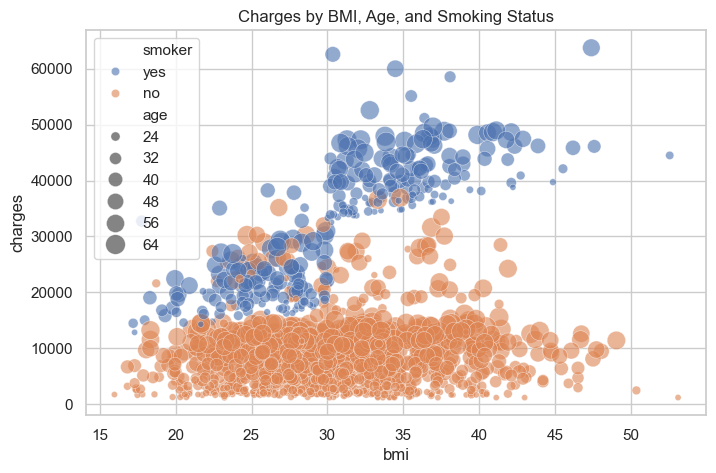

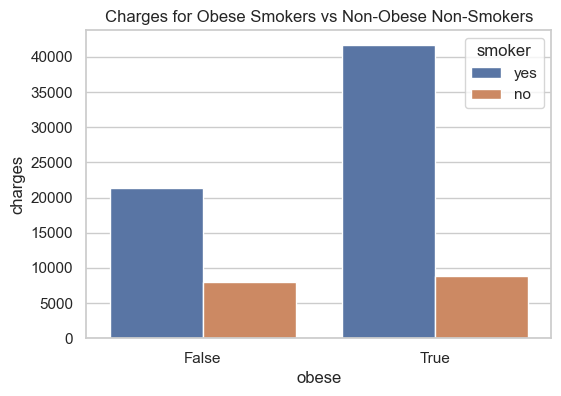

In [12]:

# 1. Smoking status + Age vs Charges
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', style='sex', data=df)
plt.title('Charges by Age, Smoking Status, and Gender')
plt.show()

# 2. Impact of gender & region on charges for smokers
plt.figure(figsize=(8,5))
sns.barplot(x='region', y='charges', hue='sex', data=df[df['smoker'] == 'yes'], errorbar=None)
plt.title('Charges by Gender & Region (Smokers Only)')
plt.show()

# 3. Age, BMI, and Smoking Status combined
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', size='age', data=df, sizes=(20,200), alpha=0.6)
plt.title('Charges by BMI, Age, and Smoking Status')
plt.show()

# 4. Obese smokers vs non-obese non-smokers
df['obese'] = df['bmi'] > 30
plt.figure(figsize=(6,4))
sns.barplot(x='obese', y='charges', hue='smoker', data=df, errorbar=None)
plt.title('Charges for Obese Smokers vs Non-Obese Non-Smokers')
plt.show()


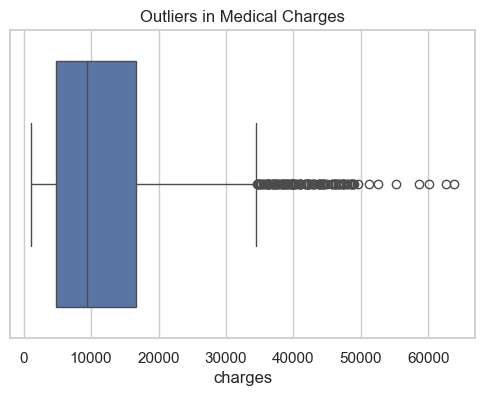

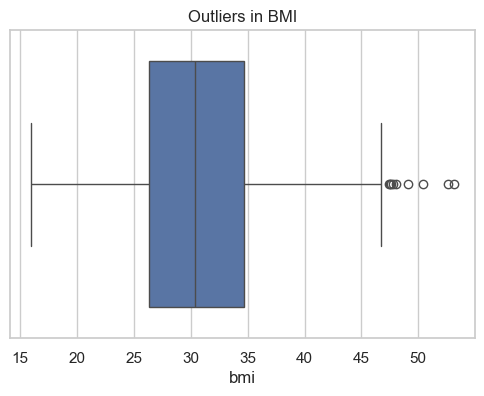

Top 5 individuals with highest medical charges:
      age     sex     bmi  children smoker     region      charges  obese
543    54  female  47.410         0    yes  southeast  63770.42801   True
1300   45    male  30.360         0    yes  southeast  62592.87309   True
1230   52    male  34.485         3    yes  northwest  60021.39897   True
577    31  female  38.095         1    yes  northeast  58571.07448   True
819    33  female  35.530         0    yes  northwest  55135.40209   True


In [13]:
# 1. Boxplot for Charges
plt.figure(figsize=(6,4))
sns.boxplot(x=df['charges'])
plt.title('Outliers in Medical Charges')
plt.show()

# 2. Boxplot for BMI
plt.figure(figsize=(6,4))
sns.boxplot(x=df['bmi'])
plt.title('Outliers in BMI')
plt.show()

# 3. Top 5 highest charges
top_charges = df.sort_values(by='charges', ascending=False).head()
print("Top 5 individuals with highest medical charges:")
print(top_charges)


In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Label Encoding for binary columns
le = LabelEncoder()
df_encoded['sex'] = le.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])
df_encoded['obese'] = le.fit_transform(df_encoded['obese'])

# One-Hot Encoding for 'region'
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

df_encoded.head()


,age,sex,bmi,children,smoker,charges,obese,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,False,False,True
1,18,1,33.770,1,0,1725.55230,1,False,True,False
2,28,1,33.000,3,0,4449.46200,1,False,True,False
3,33,1,22.705,0,0,21984.47061,0,True,False,False
4,32,1,28.880,0,0,3866.85520,0,True,False,False


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copy original dataframe
df_encoded = df.copy()

# Label Encoding for binary variables
le = LabelEncoder()
df_encoded['sex'] = le.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])
df_encoded['obese'] = le.fit_transform(df_encoded['obese'])

# One-Hot Encoding for 'region'
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

# Features & Target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (1069, 9)
Shape of X_test: (268, 9)


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}

results = []

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, rmse, mae, r2])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R²"])
results_df = results_df.sort_values(by="RMSE", ascending=True)

print(results_df)


               Model         RMSE          MAE        R²
4            XGBoost  4533.140599  2524.793141  0.888170
3      Random Forest  4711.905822  2648.035590  0.879176
0  Linear Regression  5981.256141  4296.666187  0.805310
2   Lasso Regression  5981.256659  4296.665986  0.805310
1   Ridge Regression  5983.818543  4297.727149  0.805143


In [17]:
!pip install xgboost

In [18]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [35]:
import warnings
warnings.filterwarnings("ignore")   # sab warnings ignore ho jayengi

import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def log_model_with_mlflow(model, model_name, X_train, y_train, X_test, y_test):
    if not isinstance(X_test, pd.DataFrame):
        X_test_df = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(X_test.shape[1])])
    else:
        X_test_df = X_test

    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        mlflow.sklearn.log_model(
            sk_model=model,
            name=model_name,   # abhi yehi sahi hai
            input_example=X_test_df.iloc[:5],
            registered_model_name=model_name
        )

        print(f"{model_name} logged in MLflow with RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.3f}")


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

for name, mdl in models.items():
    log_model_with_mlflow(mdl, name, X_train, y_train, X_test, y_test)

Registered model 'Linear Regression' already exists. Creating a new version of this model...
Created version '9' of model 'Linear Regression'.


Linear Regression logged in MLflow with RMSE=5981.26, MAE=4296.67, R²=0.805


Registered model 'Ridge Regression' already exists. Creating a new version of this model...
Created version '9' of model 'Ridge Regression'.


Ridge Regression logged in MLflow with RMSE=5983.82, MAE=4297.73, R²=0.805


Registered model 'Lasso Regression' already exists. Creating a new version of this model...
Created version '9' of model 'Lasso Regression'.


Lasso Regression logged in MLflow with RMSE=5981.78, MAE=4296.46, R²=0.805


Registered model 'Random Forest' already exists. Creating a new version of this model...
Created version '10' of model 'Random Forest'.


Random Forest logged in MLflow with RMSE=4754.66, MAE=2704.37, R²=0.877


Registered model 'XGBoost' already exists. Creating a new version of this model...
Created version '10' of model 'XGBoost'.


XGBoost logged in MLflow with RMSE=4978.22, MAE=2921.09, R²=0.865


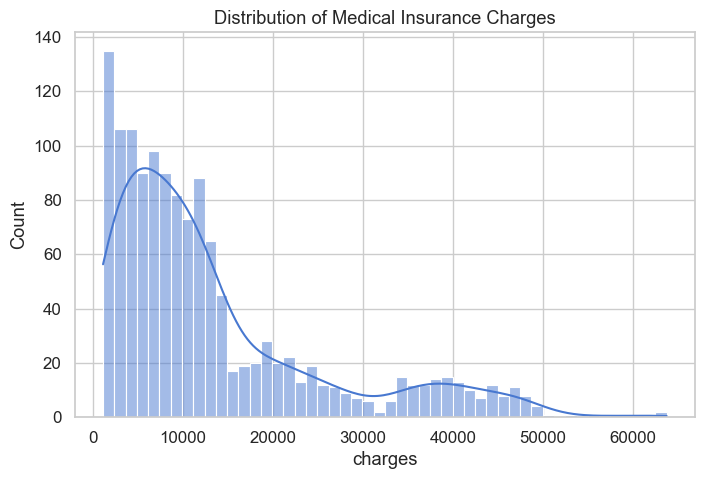

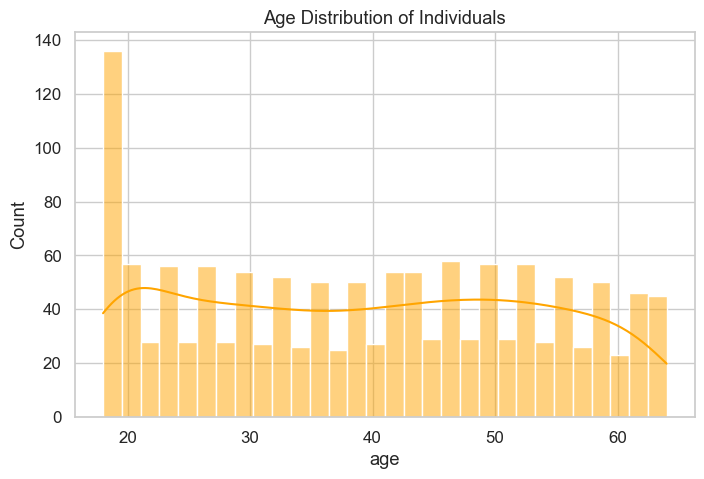

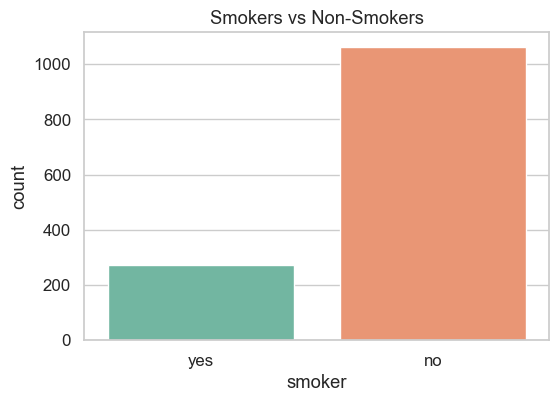

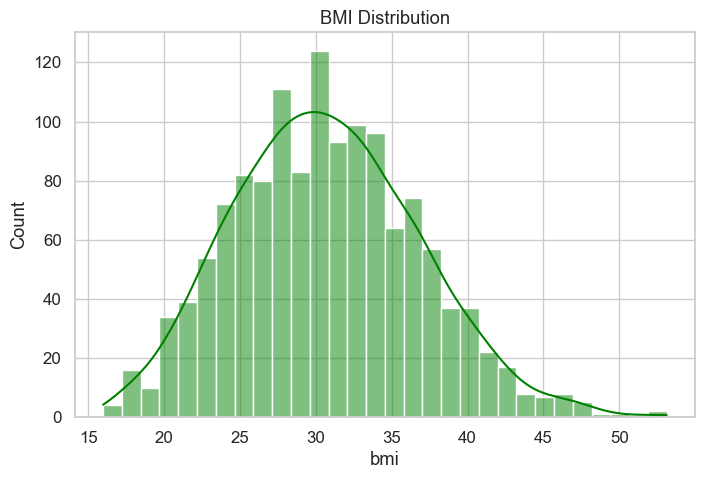

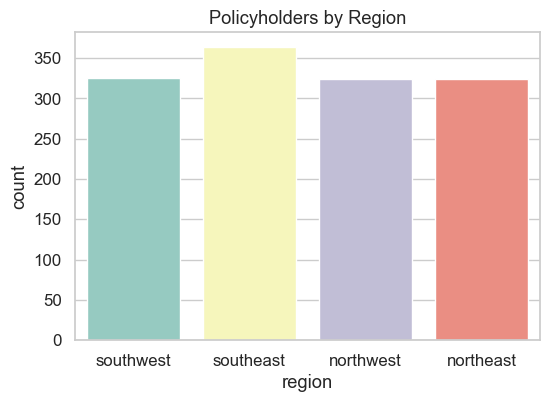

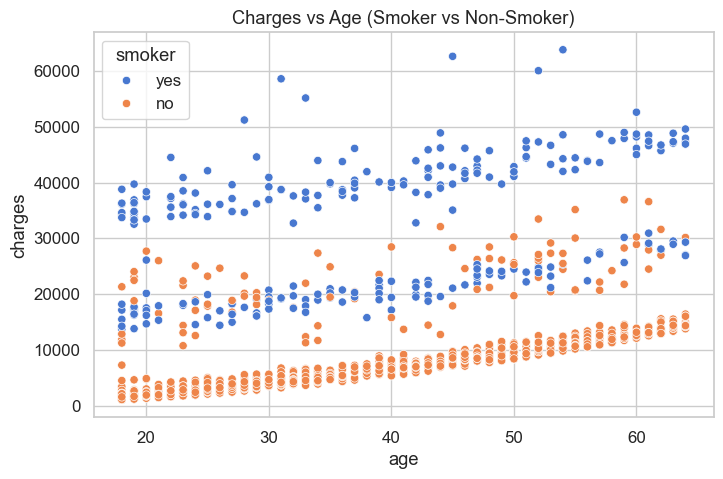

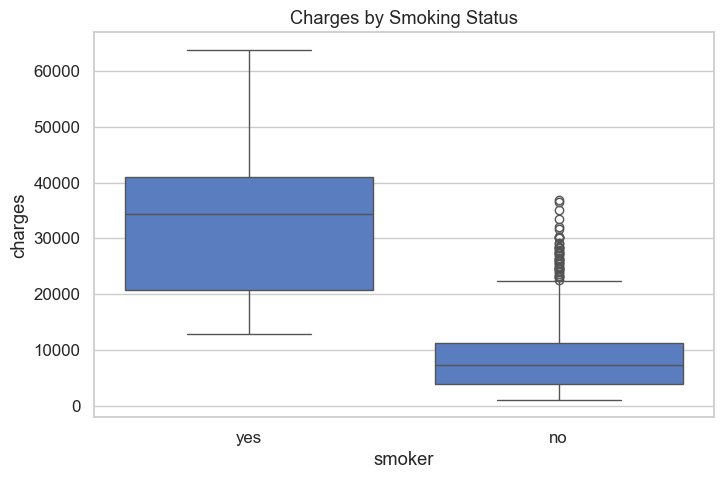

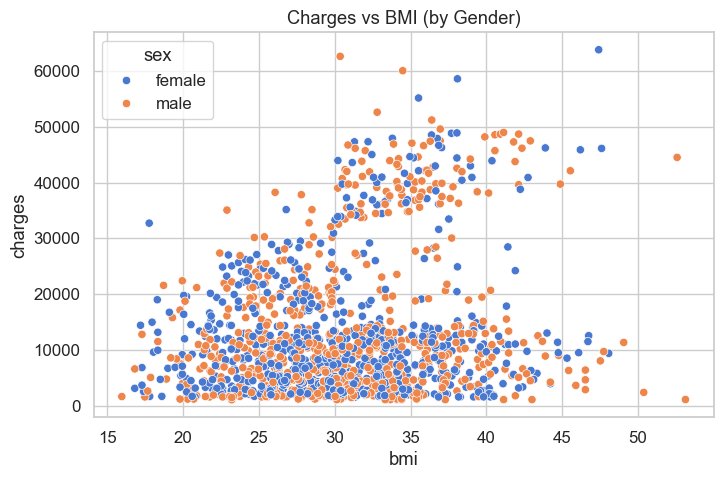

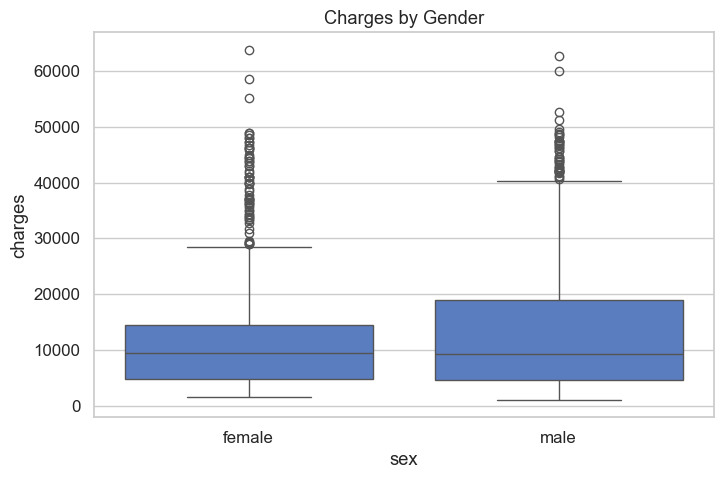

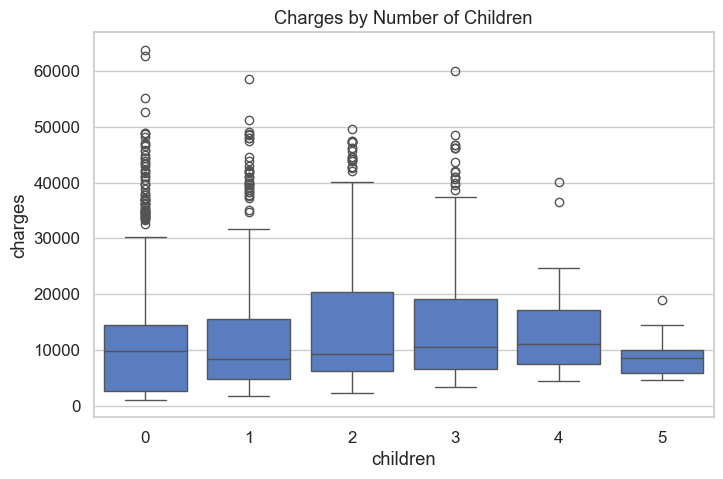

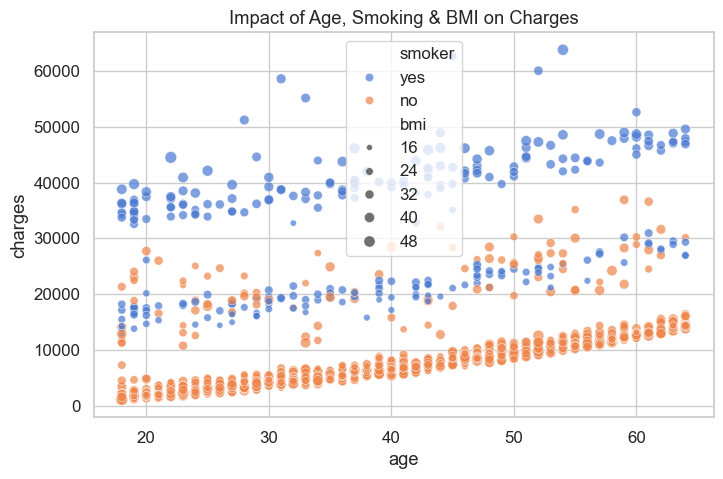

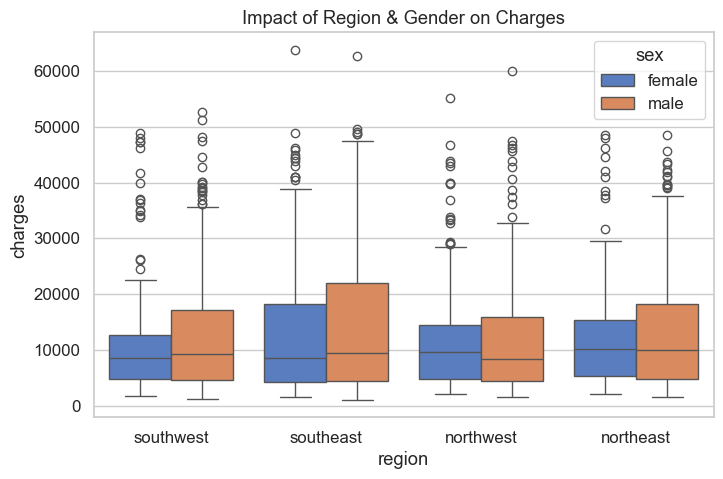

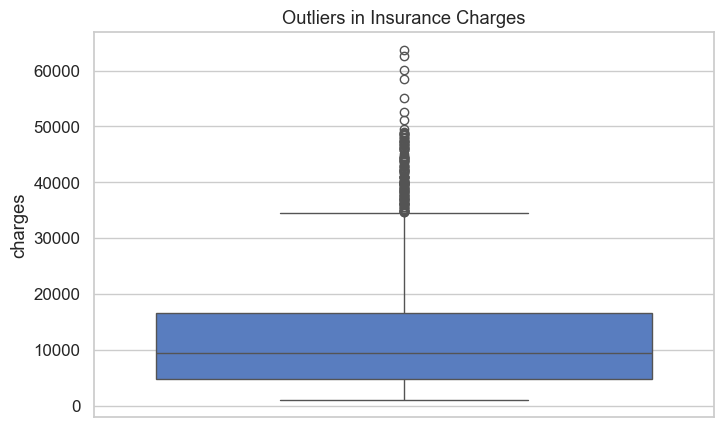

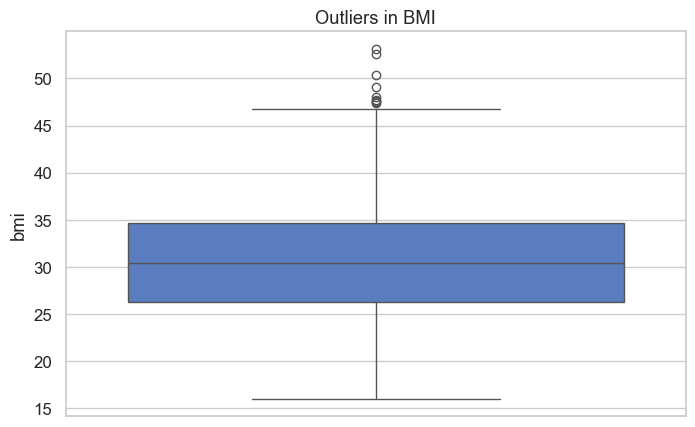

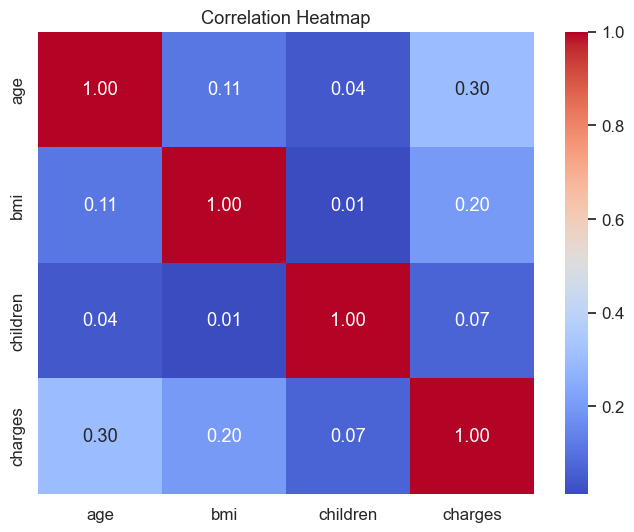

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Univariate Analysis
# -----------------------
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title("Distribution of Medical Insurance Charges")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='orange')
plt.title("Age Distribution of Individuals")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df, palette="Set2")
plt.title("Smokers vs Non-Smokers")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['bmi'], bins=30, kde=True, color='green')
plt.title("BMI Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='region', data=df, palette="Set3")
plt.title("Policyholders by Region")
plt.show()


# 2. Bivariate Analysis
# -----------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Charges vs Age (Smoker vs Non-Smoker)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df)
plt.title("Charges vs BMI (by Gender)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Gender")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='children', y='charges', data=df)
plt.title("Charges by Number of Children")
plt.show()


# 3. Multivariate Analysis
# -----------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', size='bmi', data=df, alpha=0.7)
plt.title("Impact of Age, Smoking & BMI on Charges")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', hue='sex', data=df)
plt.title("Impact of Region & Gender on Charges")
plt.show()


# 4. Outlier Detection
# -----------------------
plt.figure(figsize=(8,5))
sns.boxplot(y='charges', data=df)
plt.title("Outliers in Insurance Charges")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(y='bmi', data=df)
plt.title("Outliers in BMI")
plt.show()


# 5. Correlation Analysis
# -----------------------
plt.figure(figsize=(8,6))
corr = df[['age','bmi','children','charges']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Feature-target split
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = []

from sklearn.preprocessing import LabelEncoder

# Label Encoding categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df.reset_index(drop=True, inplace=True)

results_df


,Model,RMSE,MAE,R²
0,Gradient Boosting,4353.942158,2574.843268,0.896837
1,Random Forest,4632.973318,2560.895913,0.883191
2,XGBoost,4697.368839,2614.131311,0.879921
3,Linear Regression,5981.447548,4295.132958,0.805298
4,Lasso Regression,5981.452121,4295.129725,0.805297
5,Ridge Regression,5994.931511,4302.178307,0.804419


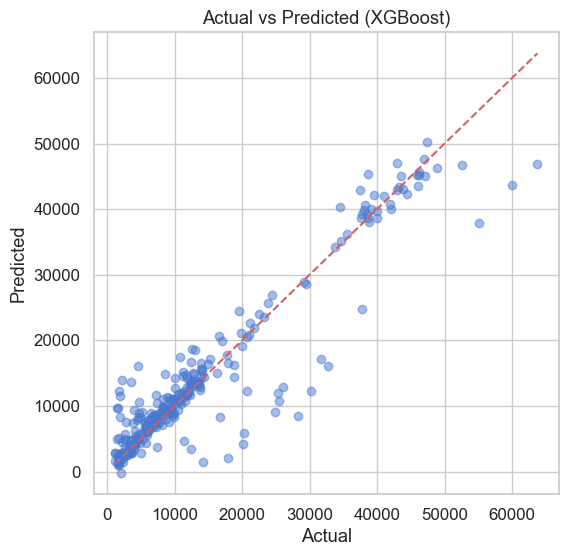

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted ({name})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


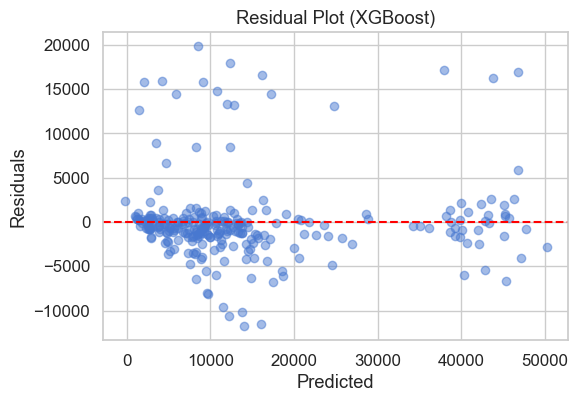

In [45]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title(f"Residual Plot ({name})")
plt.show()


In [53]:
print(results)

[{'Model': 'Linear Regression', 'RMSE': 5981.44754827836, 'MAE': 4295.132958091696, 'R²': 0.8052977736571292}, {'Model': 'Ridge Regression', 'RMSE': 5994.931510740144, 'MAE': 4302.178306510825, 'R²': 0.8044189507105091}, {'Model': 'Lasso Regression', 'RMSE': 5981.452121111631, 'MAE': 4295.129724542044, 'R²': 0.8052974759562292}, {'Model': 'Random Forest', 'RMSE': 4632.973317751008, 'MAE': 2560.895912772015, 'R²': 0.8831905663902772}, {'Model': 'Gradient Boosting', 'RMSE': 4353.94215774767, 'MAE': 2574.8432679906487, 'R²': 0.8968370790268314}, {'Model': 'XGBoost', 'RMSE': 4697.368839499848, 'MAE': 2614.13131137262, 'R²': 0.8799208389151774}]


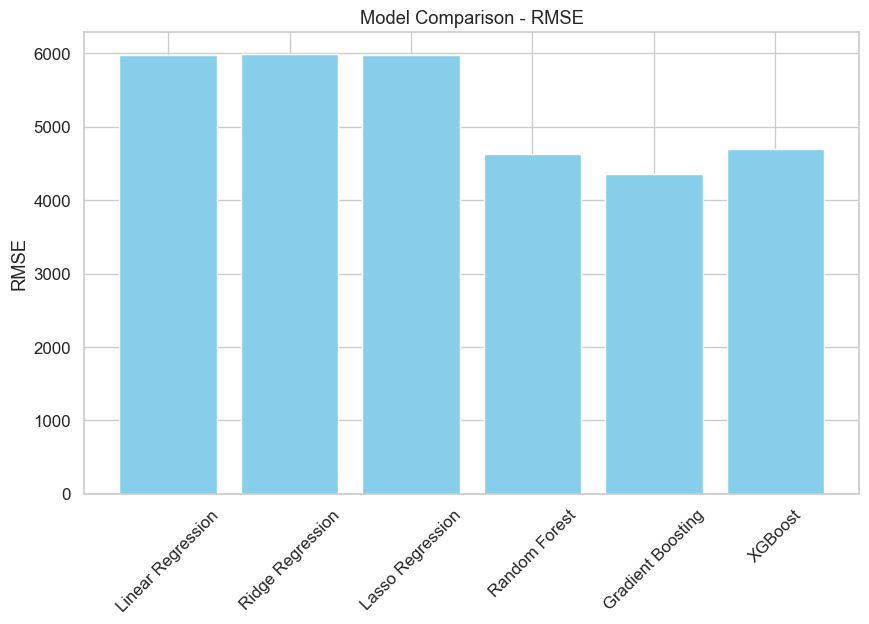

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar([r["Model"] for r in results], [r["RMSE"] for r in results], color="skyblue")
plt.ylabel("RMSE")
plt.title("Model Comparison - RMSE")
plt.xticks(rotation=45)
plt.show()


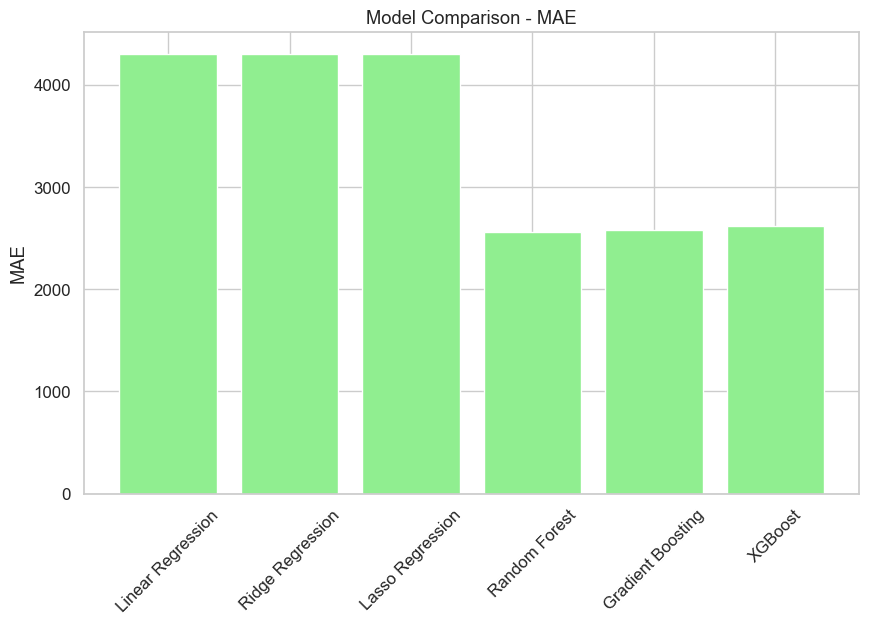

In [57]:
plt.figure(figsize=(10,6))
plt.bar([r["Model"] for r in results], [r["MAE"] for r in results], color="lightgreen")
plt.ylabel("MAE")
plt.title("Model Comparison - MAE")
plt.xticks(rotation=45)
plt.show()


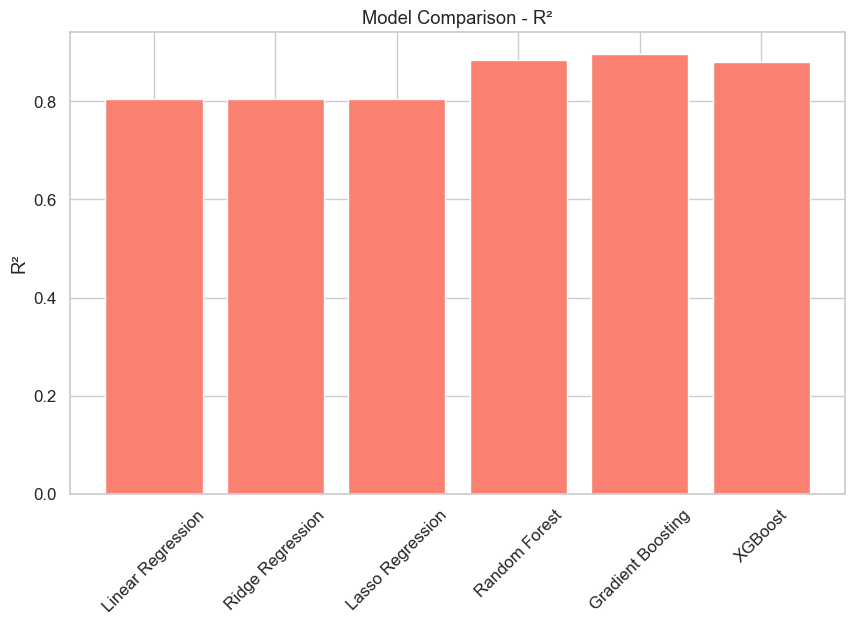

In [59]:
plt.figure(figsize=(10,6))
plt.bar([r["Model"] for r in results], [r["R²"] for r in results], color="salmon")
plt.ylabel("R²")
plt.title("Model Comparison - R²")
plt.xticks(rotation=45)
plt.show()


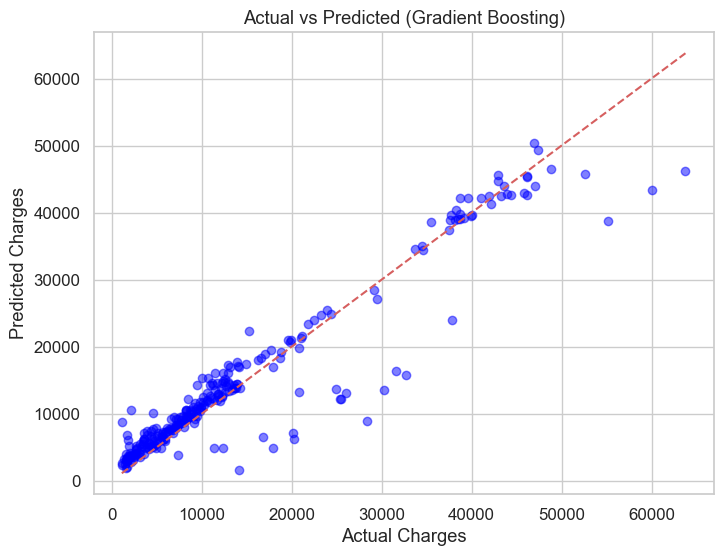

In [61]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Best Model - Gradient Boosting
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted (Gradient Boosting)")
plt.show()


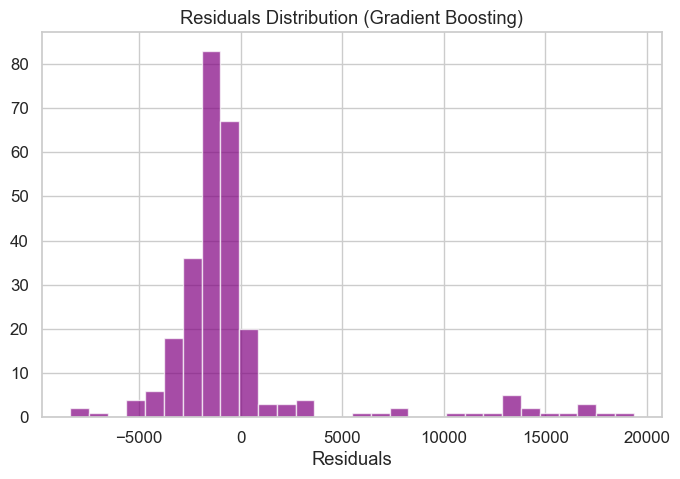

In [63]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color="purple", alpha=0.7)
plt.xlabel("Residuals")
plt.title("Residuals Distribution (Gradient Boosting)")
plt.show()


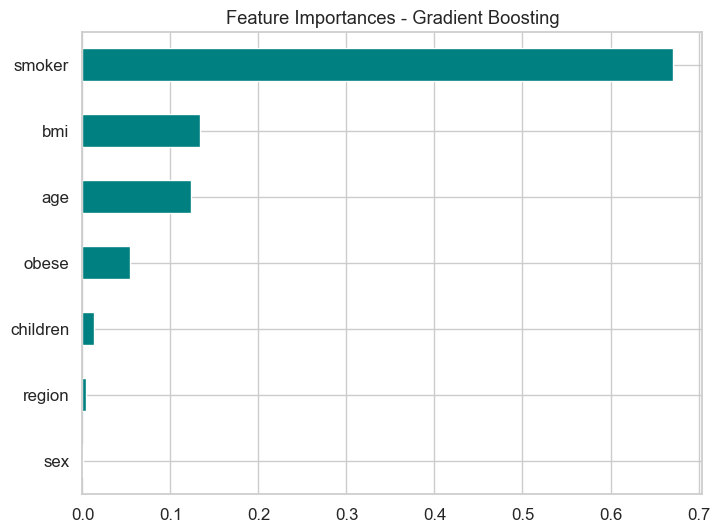

In [65]:
import pandas as pd

feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8,6), color="teal")
plt.title("Feature Importances - Gradient Boosting")
plt.show()


In [71]:
import joblib

# Save the best model
joblib.dump(best_model, "gradient_boosting_model.pkl")

# Load the model again (for testing)
loaded_model = joblib.load("gradient_boosting_model.pkl")

# Check prediction with loaded model
print("Sample Prediction:", loaded_model.predict(X_test[:5]))


Sample Prediction: [10503.5266198   7231.16269441 13518.52414866 38985.40885304
  6291.91961768]


In [75]:
import mlflow

with mlflow.start_run(run_name="Best_Model_GradientBoosting"):
    mlflow.sklearn.log_model(best_model, "best_model")
    mlflow.log_metric("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("MAE", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("R2", r2_score(y_test, y_pred))
